# Tirgul 5

## Topics
* Hypothesis testing using permutations
* t-test with the scipy.stats library


## Hypothesis testing

A statistical hypothesis test is a method of statistical inference used to decide whether the data at hand sufficiently support a particular hypothesis.

https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

## Permutation tests

A permutation test (also called a randomization test, re-randomization test, or an exact test) is a type of statistical significance test in which the distribution of the test statistic under the null hypothesis is obtained by calculating all possible values of the test statistic under all possible rearrangements of the observed data points

https://en.wikipedia.org/wiki/Resampling_(statistics)#Permutation_tests


To illustrate the basic idea of a permutation test, suppose we collect random variables $X_A$ and $X_B$ for each individual from two groups $A$ and $B$ whose sample means are $\bar{x}_{A}$ and $\bar{x}_{B}$, and that we want to know whether $X_A$ and $X_B$ come from the same distribution. Let $n_{A}$ and $n_{B}$ be the sample size collected from each group. The permutation test is designed to determine whether the observed difference between the sample means is large enough to reject, at some significance level, the null hypothesis H$_{0}$ that the data drawn from $A$ is from the same distribution as the data drawn from $B$.

The test proceeds as follows. First, the difference in means between the two samples is calculated: this is the observed value of the test statistic,$T_\text{obs}$.

Next, the observations of groups $A$ and $B$ are pooled, and the difference in sample means is calculated and recorded for every possible way of dividing the pooled values into two groups of size $n_{A}$ and $n_{B}$ (i.e., for every permutation of the group labels A and B).  The set of these calculated differences is the exact distribution of possible differences (for this sample) under the null hypothesis that group labels are exchangeable (i.e., are randomly assigned).

The one-sided p-value of the test is calculated as the proportion of sampled permutations where the difference in means was greater than or equal to $T_\text{obs}$. The two-sided p-value of the test is calculated as the proportion of sampled permutations where the [[absolute difference]] was greater than or equal to $|T_\text{obs}|$.

Alternatively, if the only purpose of the test is to reject or not reject the null hypothesis, one could sort the recorded differences, and then observe if $T_\text{obs}$ is contained within the middle $(1 - \alpha) \times 100$% of them, for some significance level $\alpha$. If it is not, we reject the hypothesis of identical probability curves at the $\alpha\times100\%$ significance level.

### The Iris dataset

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

## Our Null Hypothesis
* There is no difference between mean sepal length for <em>Iris virginca</em> and <em>Iris versicolor</em>.

In [1]:
# import packages
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
iris = datasets.load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


In [3]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
5,5.4,3.9,1.7,0.4,0.0,setosa
6,4.6,3.4,1.4,0.3,0.0,setosa
7,5.0,3.4,1.5,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
9,4.9,3.1,1.5,0.1,0.0,setosa


We'll use a permutation test to compare the mean sepal length for <em>Iris virginca</em> and <em>Iris versicolor</em>. We start by comparing the actual mean sepal length for the species we're intrested in.

In [4]:
# group by species
by_species = df.groupby("species")
by_species.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
5,5.4,3.9,1.7,0.4,0.0,setosa
6,4.6,3.4,1.4,0.3,0.0,setosa
7,5.0,3.4,1.5,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
9,4.9,3.1,1.5,0.1,0.0,setosa


Seperate out the species we're interested in


In [5]:
virginica = by_species.get_group("virginica")
versicolor = by_species.get_group("versicolor")

work with only 10 rows of each species (this is done to make things more interesting because the more rows we look at the more significant result we will get in the end)

In [6]:
virginica = virginica[0:10]
versicolor = versicolor[0:10]

In [7]:
versicolor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
50,7.0,3.2,4.7,1.4,1.0,versicolor
51,6.4,3.2,4.5,1.5,1.0,versicolor
52,6.9,3.1,4.9,1.5,1.0,versicolor
53,5.5,2.3,4.0,1.3,1.0,versicolor
54,6.5,2.8,4.6,1.5,1.0,versicolor
55,5.7,2.8,4.5,1.3,1.0,versicolor
56,6.3,3.3,4.7,1.6,1.0,versicolor
57,4.9,2.4,3.3,1.0,1.0,versicolor
58,6.6,2.9,4.6,1.3,1.0,versicolor
59,5.2,2.7,3.9,1.4,1.0,versicolor


Get the actual mean sepal length for each


In [8]:
virg_mean = virginica['sepal length (cm)'].mean()
print(f'The mean sepal length for virginica is {virg_mean} cm')
vers_mean = versicolor['sepal length (cm)'].mean()
print(f'The mean sepal length for versicolor is {vers_mean} cm')


The mean sepal length for virginica is 6.57 cm
The mean sepal length for versicolor is 6.1 cm


Calculate the absolute difference


In [9]:
abs_dif = np.abs(virg_mean - vers_mean)
print(f'The absolute difference between the means is {abs_dif} cm')

The absolute difference between the means is 0.47000000000000064 cm


Now the permutation test: 
1. Pool variables into a single distribution


In [10]:
pooled = np.concatenate((virginica['sepal length (cm)'].values,
                        versicolor['sepal length (cm)'].values))

2. Construct a simulated sampling distribution


In [11]:
runs = 1000
sample_size = len(virginica)
diffs = np.zeros(runs)
for ii in range(runs):
    np.random.shuffle(pooled)
    sample_1 = pooled[:sample_size]
    sample_2 = pooled[-sample_size:]
    diffs[ii]= np.abs(sample_1.mean() - sample_2.mean())

In [12]:
# compute our p-value
larger = np.where(diffs>=abs_dif, 1, 0)
p_val = np.sum(larger)/runs
print(f'The p-value is {p_val}')
np.sum(larger)

The p-value is 0.19


190

### Let's look at it visually

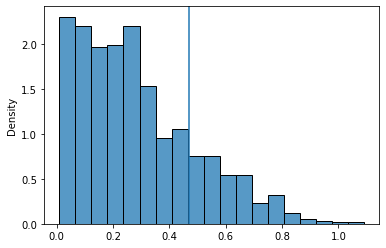

In [13]:
import seaborn as sns
ax = sns.histplot(diffs, stat='density')
ax.axvline(abs_dif)

# 3. Using `scipy.stats` tests

We can compare the results above to a t-test using the `scipy.stats` library

### The scipy.stats library

This module contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.

https://docs.scipy.org/doc/scipy/reference/stats.html


In [14]:
import scipy.stats as stats

In [15]:
stats.ttest_ind(virginica['sepal length (cm)'], versicolor['sepal length (cm)'])

Ttest_indResult(statistic=1.3707421122118835, pvalue=0.18730715303330478)